# 0. Useful libraries

In [7]:
from imports import *
from utils import *

# 1. Explore datasets

## 1.1. Time-series

For both 1D and 3D turbulent velocity trajectories, we plot a sample time series:

In [8]:
# File of 1D turbulent velocity trajectories
file_1d = 'Lagr_u1c_diffusion-demo.h5'

# Fetch the file
trajectories_1d = file_loader(file_1d)

# Plot the time series of the 2nd trajectory
sample_1d = trajectories_1d[2]
plot_time_series(sample_1d)

Keys of the file Lagr_u1c_diffusion-demo.h5 : ['max', 'min', 'train']
    min value : -11.244815117091042
    max value : 10.314160931635518
    data shape : (n_samples, n_timesteps, n_dimensions) = (768, 2000, 1)


In [9]:
# Name of the 3D turbulent velocity trajectories
file_3d = 'Lagr_u3c_diffusion-demo.h5'

# Fetch the file
trajectories_3d = file_loader(file_3d)

# Plot the time-series of the 150th trajectory
sample_3d = trajectories_3d[150]
plot_time_series(sample_3d)

Keys of the file Lagr_u3c_diffusion-demo.h5 : ['max', 'min', 'train']
    min value : [ -9.97037474 -11.24481512  -9.49838034]
    max value : [10.27369886 10.31416093 10.19539748]
    data shape : (n_samples, n_timesteps, n_dimensions) = (256, 2000, 3)


## 1.2. Probability density function (PDF) of velocity increments

In [19]:
tau_values = [1,50,100,500]
increments_1d = {}

for tau in list(tau_values):
    increments_1d_tau = std_velocity_increments(trajectories_1d, tau)
    increments_1d[tau] = increments_1d_tau

For 1 dimension(s), each dimension has 1535232 samples of velocity increments at τ = 1.
For 1 dimension(s), each dimension has 1497600 samples of velocity increments at τ = 50.
For 1 dimension(s), each dimension has 1459200 samples of velocity increments at τ = 100.
For 1 dimension(s), each dimension has 1152000 samples of velocity increments at τ = 500.


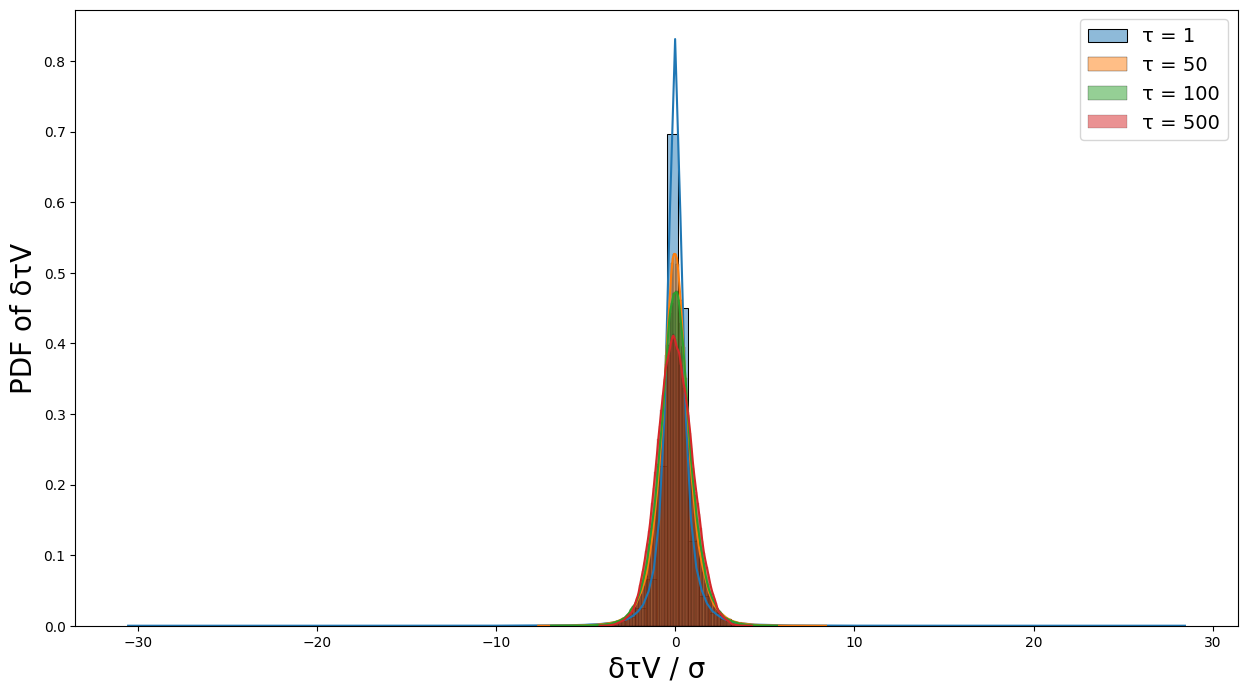

In [21]:
fig, ax = plt.subplots(figsize=(15, 8))

for (tau,increment_1d) in increments_1d.items():
    fig = sns.histplot(x = increment_1d[:,0],
                   kde=True,
                   bins=100,
                   stat='density',
                   label=f'τ = {tau}')
ax.set_xlabel('δτV / σ', fontsize=20)
ax.set_ylabel('PDF of δτV', fontsize=20)
ax.legend(fontsize=14)

The probability density functions (PDFs) of velocity increments δτV become more pronounced at decreasing the time scale τ.